<a href="https://colab.research.google.com/github/programacaodinamica/data-viz/blob/master/M%C3%A3o_%C3%A0_obra_Visualiza%C3%A7%C3%A3o_de_Dados_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Explorando os dados

In [ ]:
!pip install geopandas

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 303kB/s 
     |████████████████████████████████| 10.9MB 42.5MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
#importando os conjuntos de dados
municipios = pd.read_csv('/content/drive/My Drive/Colab Datasets/MC01/brasil-municipios.csv')
idhm = pd.read_csv('/content/drive/My Drive/Colab Datasets/MC01/atlas2013_dadosbrutos_idhm_pt.csv', sep=';', decimal=',')
covid = pd.read_excel('/content/drive/My Drive/Colab Datasets/MC01/HIST_PAINEL_COVIDBR_27jun2020.xlsx')

In [ ]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [ ]:
idhm.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,2010,11,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
2,2010,11,110003,1100031,CABIXI,0.650,0.559,0.757,0.650
3,2010,11,110004,1100049,CACOAL,0.718,0.620,0.821,0.727
4,2010,11,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688


In [ ]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        5565 non-null   int64  
 1   UF         5565 non-null   int64  
 2   Codmun6    5565 non-null   int64  
 3   Codmun7    5565 non-null   int64  
 4   Município  5565 non-null   object 
 5   IDHM       5565 non-null   float64
 6   IDHM_E     5565 non-null   float64
 7   IDHM_L     5565 non-null   float64
 8   IDHM_R     5565 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 391.4+ KB


In [ ]:
covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


In [ ]:
covid.dropna( subset=['municipio'], inplace=True )

In [ ]:
covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
3565,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-27,13,22945,0,0,0,0,NaN,NaN,0.0
3566,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-28,13,22945,0,0,0,0,NaN,NaN,0.0
3567,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-29,14,22945,0,0,0,0,NaN,NaN,0.0
3568,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-30,14,22945,0,0,0,0,NaN,NaN,0.0
3569,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-31,14,22945,0,0,0,0,NaN,NaN,0.0


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490575 entries, 3565 to 495999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   regiao                 490575 non-null  object        
 1   estado                 490575 non-null  object        
 2   municipio              490575 non-null  object        
 3   coduf                  490575 non-null  int64         
 4   codmun                 490575 non-null  float64       
 5   codRegiaoSaude         490575 non-null  float64       
 6   nomeRegiaoSaude        490575 non-null  object        
 7   data                   490575 non-null  datetime64[ns]
 8   semanaEpi              490575 non-null  int64         
 9   populacaoTCU2019       490575 non-null  object        
 10  casosAcumulado         490575 non-null  int64         
 11  casosNovos             490575 non-null  int64         
 12  obitosAcumulado        490575 non-null  i

In [ ]:
idhm.describe()

,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
count,5565.0,5565.000000,5565.000000,5.565000e+03,5565.000000,5565.000000,5565.000000,5565.000000
mean,2010.0,32.372327,325304.894160,3.253053e+06,0.659157,0.559094,0.801564,0.642873
std,0.0,9.829957,98452.148072,9.845215e+05,0.071997,0.093328,0.044681,0.080662
min,2010.0,11.000000,110001.000000,1.100015e+06,0.418000,0.207000,0.672000,0.400000
25%,2010.0,25.000000,251210.000000,2.512101e+06,0.599000,0.490000,0.769000,0.572000
50%,2010.0,31.000000,314620.000000,3.146206e+06,0.665000,0.560000,0.808000,0.654000
75%,2010.0,41.000000,411900.000000,4.119004e+06,0.718000,0.631000,0.836000,0.707000
max,2010.0,53.000000,530010.000000,5.300108e+06,0.862000,0.825000,0.894000,0.891000


In [ ]:
covid.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
count,490575.000000,490575.000000,490575.000000,490575.000000,490575.000000,490575.000000,490575.000000,490575.000000,0.0,0.0,490575.000000
mean,32.035450,321947.996967,32061.193175,19.849462,67.065841,2.667133,3.568478,0.116147,NaN,NaN,0.072607
std,9.696273,97137.395257,9700.163463,3.837976,996.353103,34.980280,73.926749,2.097717,NaN,NaN,0.259490
min,11.000000,110001.000000,11001.000000,13.000000,0.000000,-349.000000,0.000000,-36.000000,NaN,NaN,0.000000
25%,25.000000,251000.000000,25008.000000,17.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,31.000000,314050.000000,31049.000000,20.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,41.000000,411120.000000,41010.000000,23.000000,9.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
max,53.000000,530010.000000,53001.000000,26.000000,122759.000000,6877.000000,6982.000000,227.000000,NaN,NaN,1.000000


In [ ]:
covid.sort_values(by='casosNovos')

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
297784,Sudeste,RJ,Niterói,33,330330.0,33006.0,METROPOLITANA II,2020-05-26,22,513584,1692,-349,92,3,NaN,NaN,1.0
293815,Sudeste,RJ,Armação dos Búzios,33,330023.0,33002.0,BAIXADA LITORANEA,2020-06-25,26,33870,199,-252,5,0,NaN,NaN,0.0
15838,Norte,AM,Tefé,13,130420.0,13008.0,TRIANGULO,2020-06-25,26,59849,2715,-244,78,2,NaN,NaN,0.0
400362,Sul,SC,Florianópolis,42,420540.0,42007.0,GRANDE FLORIANOPOLIS,2020-05-25,22,500973,500,-144,6,-1,NaN,NaN,1.0
49771,Nordeste,MA,Davinópolis,21,210375.0,21008.0,IMPERATRIZ,2020-06-13,24,12908,128,-142,4,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199329,Nordeste,BA,Salvador,29,292740.0,29020.0,SALVADOR,2020-06-27,26,2872347,31199,3486,1065,19,NaN,NaN,1.0
352220,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-06-26,26,12252023,121163,3852,6880,86,NaN,NaN,1.0
352219,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-06-25,26,12252023,117311,4050,6794,119,NaN,NaN,1.0
352210,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-06-16,25,12252023,97676,4228,5819,167,NaN,NaN,1.0


In [ ]:
br_UF = gpd.read_file('/content/drive/My Drive/Colab Datasets/MC01/br_UF/BR_UF_2019.shx')

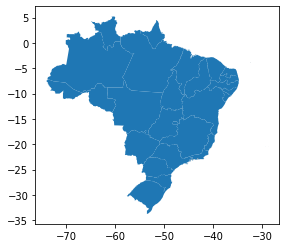

In [ ]:
br_UF.plot()